# Question 9

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w



def f(x):
    return (((x**4)*(math.exp(x)))/(math.exp(x)-1)**2)

print('Put temperature in kelvin:')
T=float(input())

def Cv(T):
    a=0
    b=428/T
    N=50
    x,w=gaussxwab(N,a,b)
    val=0
    for i in range(N):
        val+=(w[i])*(f(x[i]))
    V=1e-3
    rho=6.022e28
    theta_D=428
    k_b=1.381e-23
    C_v= (9*V*rho*k_b)*((T/theta_D)**3)*val
    return C_v

        

print(Cv(T))

Put temperature in kelvin:
600
2432.5741254976624


Text(0, 0.5, 'Heat Capacity')

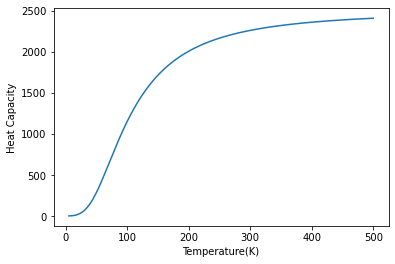

In [2]:
#part b
V=1e-3
rho=6.022e28
theta_D=428
k_b=1.381e-23
val=0
        

C=[]
T=np.linspace(5,500,495)
for i in range(495):
    val= Cv(T[i])
    C.append(val)
    
plt.plot(T,C)
plt.xlabel('Temperature(K)')
plt.ylabel('Heat Capacity')

    